## Macroeconomics factors
### Importing data 

In [12]:
# Importing required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Importing required models
from sklearn import linear_model
from statsmodels.tools.eval_measures import rmse
from sklearn.cross_decomposition import PLSRegression

# Importing required function
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Loading data files
df = pd.read_csv('Data.csv')
df

,GDP,Exports,GNI,Imports,CPI,GDPI,Population,Unemployment,FDI
0,6.524,22.714,6.760,24.753,9.196,8.415,0.193,2.60,1.414
1,-2.484,27.139,-2.495,31.625,16.044,15.059,0.063,2.60,2.122
2,-1.474,25.703,-1.776,27.078,24.207,25.771,-0.007,4.00,1.373
3,2.910,28.344,2.976,29.102,16.560,15.114,-0.025,5.50,1.292
4,2.458,30.023,1.941,28.936,15.840,13.710,-0.033,5.80,1.683
5,4.204,28.345,4.331,26.666,8.263,11.458,0.005,5.70,1.128
6,3.749,27.704,3.537,26.982,13.421,14.067,0.090,5.30,1.474
7,-2.031,26.933,-2.289,24.403,17.966,19.704,0.120,6.80,1.792
8,-0.788,26.290,-0.733,23.127,11.877,11.569,0.035,10.40,1.087
9,1.995,25.938,1.893,23.700,8.599,7.419,-0.036,10.90,1.051


### Descriptive Data

In [14]:
# Reading data type and obs
df_info = df.info()
df_info
# Data definition

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GDP           50 non-null     float64
 1   Exports       50 non-null     float64
 2   GNI           49 non-null     float64
 3   Imports       50 non-null     float64
 4   CPI           50 non-null     float64
 5   GDPI          50 non-null     float64
 6   Population    50 non-null     float64
 7   Unemployment  47 non-null     float64
 8   FDI           50 non-null     float64
dtypes: float64(9)
memory usage: 3.6 KB


In [15]:
# Missing Data handling

# age is a continuous variable, replace with mean age
mean_GNI = df['GNI'].mean()
mean_Unemployment = df['Unemployment'].mean()
df['GNI'].replace(np.nan, mean_GNI, inplace=True)
df['Unemployment'].replace(np.nan, mean_Unemployment, inplace=True)



/var/folders/y4/1swrb3ns1n5g6cd_1pvgr_6m0000gn/T/ipykernel_38349/3471126285.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GNI'].replace(np.nan, mean_GNI, inplace=True)
/var/folders/y4/1swrb3ns1n5g6cd_1pvgr_6m0000gn/T/ipykernel_38349/3471126285.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [16]:
# Calculating correlation between variables
corr = df.corr()
corr.to_csv("Correlation.csv")
corr

,GDP,Exports,GNI,Imports,CPI,GDPI,Population,Unemployment,FDI
GDP,1.000000,-0.114897,0.977847,-0.052535,-0.164479,-0.247047,-0.167910,0.073497,-0.042276
Exports,-0.114897,1.000000,-0.137686,0.845581,0.014998,-0.063558,0.173369,-0.153022,-0.186528
GNI,0.977847,-0.137686,1.000000,-0.081207,-0.173270,-0.261137,-0.157709,0.061823,-0.063527
Imports,-0.052535,0.845581,-0.081207,1.000000,-0.115364,-0.204391,0.373870,-0.428120,-0.009161
CPI,-0.164479,0.014998,-0.173270,-0.115364,1.000000,0.937932,-0.619814,-0.112215,-0.320542
GDPI,-0.247047,-0.063558,-0.261137,-0.204391,0.937932,1.000000,-0.598976,-0.095773,-0.273242
Population,-0.167910,0.173369,-0.157709,0.373870,-0.619814,-0.598976,1.000000,-0.279475,0.415023
Unemployment,0.073497,-0.153022,0.061823,-0.428120,-0.112215,-0.095773,-0.279475,1.000000,-0.327353
FDI,-0.042276,-0.186528,-0.063527,-0.009161,-0.320542,-0.273242,0.415023,-0.327353,1.000000


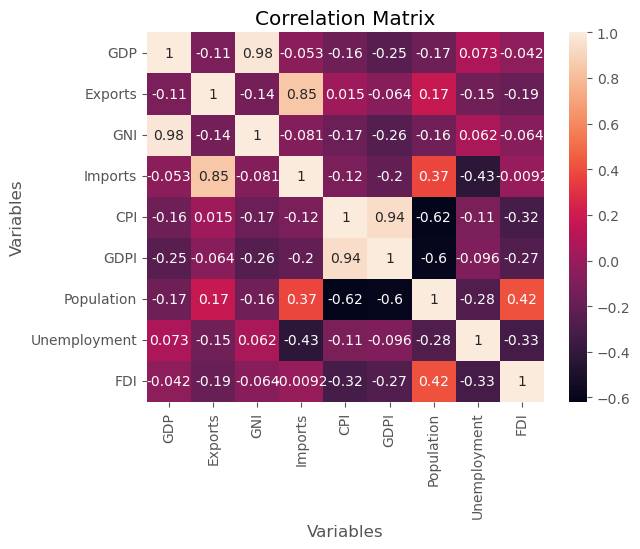

In [17]:
sns.heatmap(corr, annot=True)

plt.title('Correlation Matrix')

plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()

In [18]:
# Descriptive data
describe = df.describe()
describe.to_csv("Describe.csv")

In [19]:
mean = df.mean()
std = df.std()
cv = df.std()/df.mean()*100

In [20]:
# Table 1: Descriptive data results
data = {
    'Variables': ['Exports', 'GDP', 'GNI', 'Imports', 'CPI', 'GDPI', 'Population', 'Unemployment', 'FDI'],
    'Obs': [50, 50, 49, 50, 50, 50, 50, 47, 50],
    'Min': [df.agg("min").values],
    'Max': [df.agg("max").values],
    'Mean': [mean.values],
    'St. Dev.': [std.values],
    'CV': [cv.values]
}
row_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
df_table = pd.DataFrame(data=data, index=row_labels)
df_table.to_csv("Descriptive data.csv")

In [21]:
# Missing data
for col in df.columns:
    missing_data = df[col].isna().sum()
    missing_percent = missing_data/len(df)*100
    print(f"Column {col}: has {missing_percent}% missing data")

Column GDP: has 0.0% missing data
Column Exports: has 0.0% missing data
Column GNI: has 0.0% missing data
Column Imports: has 0.0% missing data
Column CPI: has 0.0% missing data
Column GDPI: has 0.0% missing data
Column Population: has 0.0% missing data
Column Unemployment: has 0.0% missing data
Column FDI: has 0.0% missing data


### Train data for OLS model 

In [22]:
# Preprocessing data 
x = df[['Exports', 'GNI', 'Imports', 'CPI', 'GDPI', 'Population', 'Unemployment', 'FDI']].values
y = df['GDP'].values
# Replace missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x)
x = imputer.transform(x)
# Split the data to train
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, :] = sc.fit_transform(x_train[:, :])
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(37, 8) (13, 8) (37,) (13,)


### Kết quả mô hình OLS

In [23]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     127.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.73e-26
Time:                        23:43:37   Log-Likelihood:                -42.232
No. Observations:                  50   AIC:                             102.5
Df Residuals:                      41   BIC:                             119.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2228      1.356     -1.639      0.1

In [24]:
# Calculating the mean squared error
from statsmodels.tools.eval_measures import rmse
y_pred = model.predict(x)
rmse = rmse(y, y_pred)
rmse

0.5630996023083251